In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:09<00:00, 248MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [7]:
# !unzip /content/dogs-vs-cats.zip -d /content/dogs-vs-cats

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [21]:
# generator
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
# Normalize pixel values to be between 0 and 1
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 57s 87ms/step - loss: 0.5884 - accuracy: 0.6781 - val_loss: 0.5254 - val_accuracy: 0.7526
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4664 - accuracy: 0.7770 - val_loss: 0.4605 - val_accuracy: 0.7868
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3550 - accuracy: 0.8374 - val_loss: 0.4749 - val_accuracy: 0.7964
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2335 - accuracy: 0.9022 - val_loss: 0.6203 - val_accuracy: 0.7722
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1351 - accuracy: 0.9467 - val_loss: 0.7815 - val_accuracy: 0.7750
Epoch 6/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0898 - accuracy: 0.9680 - val_loss: 1.1736 - val_accuracy: 0.7828
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0629 - accuracy: 0.9790 - val_loss: 1.0153 - val_accuracy:

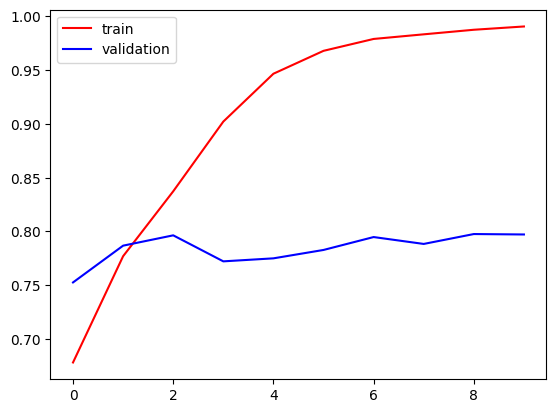

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

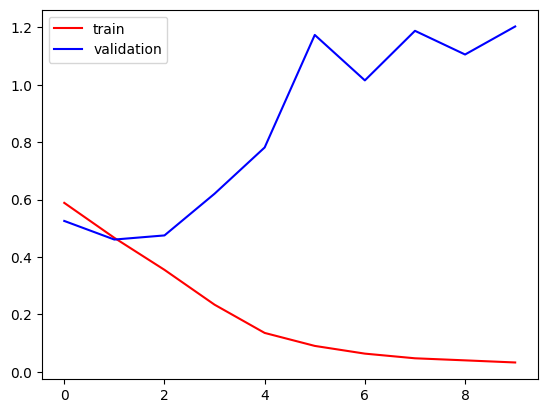

In [30]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()